# 编程作业二
对一个幅度为1，长度为10的矩形窗函数x(t)采样, 并对该函数进行傅里叶变换、低通滤波等操作，分析其时域和频域特性。

## (1) 采样
对矩形窗函数x(t)，以采样间隔ts进行采样，画出采样后的时域和频谱特性（采样间隔ts自己设置）。

## (2) 延时采样
将矩形窗函数x(t)平移0.5个采样间隔ts，以采样间隔ts进行采样，画出采样后时域 和频谱特性，并与（1）对比。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

作业中所有函数
- ```window(t)``` 幅度为1，长度为10的矩形窗函数 
- ```sampling(ts,initial_point,end_point)``` 采样函数, ts为采样间隔，initial_point为第一个采样点的时间坐标。
- ```DFT(sample)``` 离散傅里叶变换，sample 为输入信号
- ```filter(sample, ratio=0.1)``` 低通滤波器，ratio 为滤波后剩余的最高频率与原频率的比例。

In [2]:
def window(t):
    if t < 10 and t >= 0:
        return 1
    else:
        return 0


In [3]:
def sampling(ts,initial_point,end_point):
    #ts: sampling time
    #initial_point: initial point of the signal
    #end_point: end point of the signal
    #return: sampled sig
    sample_sig = []
    t = initial_point
    while t <= end_point:  
        sample_sig.append(window(t))
        t += ts
    return sample_sig


```sample 1:``` 时间间隔 $t_s = 0.1$, 初始点为$t_0 = 0$，终止点为$t_n = 10$

```sample 2:``` 时间间隔 $t_s = 0.1$, 初始点为$t_0 = 0.5t_s$，终止点为$t_n = 10+0.5t_s$

In [4]:
# Sampling, sample1 is the sampled signal in question 1, sample2 is the sampled signal in question 2
ts = 0.1
end = 20
sample1 = sampling(ts,0,end)
sample2 = sampling(ts,-0.5*ts,end-0.5*ts)

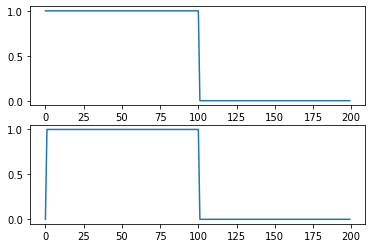

In [5]:
# Plot the sampled signal
plt.subplot(211)
plt.plot(sample1)
plt.subplot(212)
plt.plot(sample2)

利用 ```np.fft.fft()``` 对信号 ```sample 1,sample 2``` 进行傅里叶变换，并画出频谱特性。

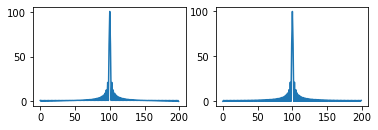

In [6]:
# fft of the sampled signal
def DFT(sample):
    fft_sample = np.fft.fft(sample)
    fft_sample = np.fft.fftshift(fft_sample)
    fft_sample = abs(fft_sample)
    return fft_sample
    
fft_sample1 = DFT(sample1)
fft_sample2 = DFT(sample2)

# Plot the fft of the sampled signal
plt.subplot(221)
plt.plot(fft_sample1)
plt.subplot(222)
plt.plot(fft_sample2)


从图像中可以看出，时移$0.5t_s$前后，DFT几乎没有差别。

## (3) 低通滤波器
将矩形窗函数x(t)平移0.5个采样间隔ts，通过一个合适的低通滤波器后再以采样间 隔ts进行采样，画出采样后时域和频谱特性，并与（1）、（2）对比。

ratio 为滤波后剩余的最高频率与原频率的比例，此处选用 ratio = 0.1

D:\CodeWorld\Anaconda\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


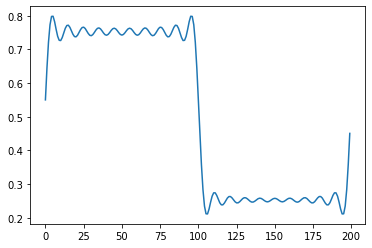

In [7]:
def filter(sample, ratio=0.1):

    fft_sample = np.fft.fft(sample)
    fft_sample[int(len(fft_sample)*ratio):len(fft_sample)] = 0
    sample = np.fft.ifft(fft_sample)
    return sample

plt.plot(filter(sample1))

## (4) 公式推导

### (4.1) Time and Frequency Domain after Sampling

1. Time Domain
$$
\begin{aligned}
&x(t)=\operatorname{rect}\left(\frac{t-10}{10}\right) \quad s(t)=\sum_{n=-\infty}^{\infty} \delta\left(t-n t_{s}\right) \\
&y(t)=x(t) \cdot s(t)=\sum_{n=-\infty}^{+\infty} x\left(n t_{s}\right) \delta\left(t-n t_{s}\right)
\end{aligned}
$$

2. Frequency Domain
$$
   \begin{aligned}
&x(t)=\operatorname{rect}\left(\frac{t-10}{10}\right) \quad s(t)=10 \mathrm{Sa}(\mathrm{sw}) \cdot e^{-10 j \omega} \\
&y(t)=\operatorname{rect}\left(\frac{t}{10}-1\right) \cdot \sum_{n=-\infty}^{+\infty} \delta\left(t-n t_{s}\right) \\
&\leftrightarrow \operatorname{10Sa}(\mathrm{5w}) \cdot e^{-10 j \omega} \cdot \sum_{n=-\infty}^{+\infty}\left(w-w_{s}\right)
\end{aligned}
$$

### (4.2) Fourier Transform after time shifting
$$
\begin{aligned}
&\text { Time shift: } \\
&y^{\prime}(t)=x(t-0.5 t s) \cdot \sum_{n=-\infty}^{+\infty} \delta\left(t-n t_{s}\right) \\
&Y{(w)}^{\prime}=X(w) \cdot e^{-\frac{1}{2} j w t_{s}} \cdot \sum_{n=-\infty}^{+\infty} \delta\left(t-n t_{s}\right) \\
&\because t_{s \rightarrow 0} \\
&\therefore e^{-\frac{1}{2} j w t_{s}} \rightarrow e^{0}=1 \\
&\therefore Y^{\prime}(w) \approx X(w) \cdot \sum_{n=-\infty}^{+\infty} \delta(t-n t s)=Y(w)
\end{aligned}
$$

时域上的采样是频域 (Sinc Function) 关于 $w_s$ 的周期延拓。
### (4.3) Low Pass Filter
$$
\begin{aligned}
&x(t)=\operatorname{rect}\left(\frac{t-10}{10}\right) \\
&X(\omega)=10 \mathrm{Sa}(\mathrm{5 \omega}) \cdot e^{-10 j \omega} \\
&X(\omega) \stackrel{\text { low pass filter }}{\longrightarrow} X(\omega) \cdot \operatorname{rect}\left(\frac{\omega-\omega_{\text {limit }}}{\omega_{\text {max }}}\right) \\
&x(t) \stackrel{\text { low pass filter }}{\longrightarrow} x(t) * k_{1} \mathrm{Sa}\left(k_{2} t\right) \cdot e^{j k_{3} t}
\end{aligned}
$$

通过滤去高通成分，当信号出现剧烈变化时，只有低通成分的作用会使滤波后的信号会更加平滑。

